<a href="https://colab.research.google.com/github/spy129/MAT494/blob/main/HW3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5 K-means**

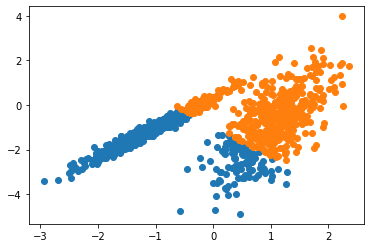

In [3]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
X, _ = make_classification(n_samples=1000, n_features=2, 
               n_informative=2, n_redundant=0, 
               n_clusters_per_class=1, random_state=4)


model = KMeans(n_clusters=2)
model.fit(X)


yhat = model.predict(X)

clusters = unique(yhat)


for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    

plt.show()

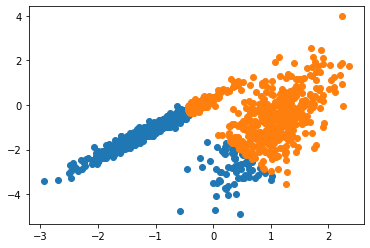

In [4]:

X, _ = make_classification(n_samples=1000, n_features=2, 
               n_informative=2, n_redundant=0, 
               n_clusters_per_class=1, random_state=4)


model = MiniBatchKMeans(n_clusters=2)
model.fit(X)


yhat = model.predict(X)


clusters = unique(yhat)


for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    

plt.show()

# **3.6 Support Vector Machine**

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
SVC()
from array import array
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')

gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)


gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([0, 1, 0])

In [8]:
# For compatibility with Python 2
from __future__ import print_function

# To load datasets
from sklearn import datasets
from sklearn.datasets import make_blobs

# To import the classifier (SVM classifier)
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# To measure accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# To support plots
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# To increase quality of figures
plt.rcParams["figure.figsize"] = (20, 10)

# To display all the plots inline
%matplotlib inline 

# Basics
import numpy as np
import math
import cvxopt

# To import the scalers
from sklearn.preprocessing import MinMaxScaler

class DummyScaler:
    def fit(self, data):
        pass
    def transform(self, data):
        return data

def create_scaler_minmax():
    return MinMaxScaler()

In [ ]:
class SVM(object):
  def fit(self, X, y):
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
      for j in range(n_samples):
        K[i,j] = np.dot(X[i], X[j])
   
    P = cvxopt.matrix(np.outer(y, y) * K)  # P = X^T X 
    q = cvxopt.matrix(np.ones(n_samples) * -1) # q = -1 (1xN)
    A = cvxopt.matrix(y, (1, n_samples)) # A = y^T
    b = cvxopt.matrix(0.0) # b = 0 
    G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1)) # -1 (NxN)
    h = cvxopt.matrix(np.zeros(n_samples)) # 0 (1xN)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    a = np.ravel(solution['x']) # Lagrange multipliers
    # Lagrange have non zero lagrange multipliers
    sv = a > 1e-5
    ind = np.arange(len(a))[sv]
    self.a = a[sv]
    self.sv = X[sv]
    self.sv_y = y[sv]
    self.b = 0  # Intercept
    for n in range(len(self.a)):
      self.b += self.sv_y[n]
      self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
      self.b /= len(self.a)

    # Weights
    self.w = np.zeros(n_features)
    for n in range(len(self.a)):
      self.w += self.a[n] * self.sv_y[n] * self.sv[n]

  def project(self, X):
    return np.dot(X, self.w) + self.b

  def predict(self, X):
    return np.sign(self.project(X))

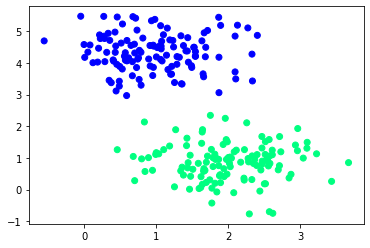

In [9]:
X, y = make_blobs(n_samples = 250, centers = 2,
                  random_state = 0, cluster_std = 0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

# plot the data we just generated
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter')